<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/01_Generalized_Linear_Models/02-01-06-03-poisson-regression-overdispersion-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 6.3. Poisson Regression Models for Overdispersed Data

When analyzing count data, you may encounter overdispersion, which occurs when the observed variability in the data is more significant than what a standard Poisson model would predict. Overdispersion often arises in real-world datasets because natural processes can introduce more variability than a simple Poisson model can accommodate. Ignoring overdispersion can lead to underestimated standard errors, unreliable confidence intervals, and misleading conclusions.

In this tutorial, we will explore methods for modeling overdispersed count data in R, focusing on approaches such as quasi-Poisson and negative binomial models, which can manage the extra variability in the data. We will begin by discussing the implications of overdispersion, then move on to fitting models from scratch and using R’s `glm()` function. After that, we’ll examine model diagnostics to detect overdispersion, evaluate the models to ensure a proper fit, and interpret incidence rate ratios (IRRs).


## Overview

**Poisson regression** is used to model count data where the response variable represents the number of occurrences of an event. A key assumption of the Poisson model is that the **mean** and the **variance** of the response variable are equal:

$$ \text{Var}(Y) = \mu $$

Where $(Y)$ is the count response variable, and $\mu$ is the mean (expected value) of the counts. However, in many real-world datasets, this assumption is often violated. When the variance is **greater than the mean**, the data exhibit **overdispersion**. Overdispersion can lead to underestimated standard errors and, as a result, inflated Type I error rates (i.e., falsely concluding that a predictor is significant).





### Causes of Overdispersion

Overdispersion in count data can occur for several reasons, including:

1.  **Unobserved heterogeneity**: There might be additional variables or factors influencing the count data that are not included in the model.

2.  **Zero-inflation**: There might be an excess of zeros in the data compared to what the Poisson model predicts.

3.  **Clustering**: Observations within clusters may be more similar than those across clusters, leading to greater variability than assumed.


### Identifying Overdispersion

-   The variance is much greater than the mean, which suggests that we will have **over-dispersion** in the model.

-   **Deviance**: If the deviance is much larger than the degrees of freedom, it suggests overdispersion. We can estimate a dispersion parameter, $ϕ$ by dividing the model deviance by its corresponding degrees of freedom; i.e.,

$$ ϕ^2 = \frac{\sum Residuals^2}{n-p} $$

-   If this statistic is significantly greater than 1, it suggests the presence of overdispersion.
-   You can also examine the **Pearson Chi-Square statistic** divided by the degrees of freedom as another indicator of overdispersion.

### Handling Overdispersion in Poisson Regression

When overdispersion is present, Poisson regression is not appropriate, and alternative models are needed. There are several approaches to address overdispersion:

1.  **Quasi-Poisson Regression**: A simple extension where the Poisson model is adjusted to allow for overdispersion by adding a dispersion parameter.
2.  **Negative Binomial Regression**: A more flexible model that explicitly accounts for overdispersion by allowing the variance to differ from the mean.
3.  **Zero-Inflated Models**: Useful when the overdispersion is caused by excess zeros in the data.


Below is the explanation of **Quasi-Poisson Regression**, **Negative Binomial Regression**, and **Zero-Inflated Models** (including **Zero-Inflated Poisson (ZIP)**, **Zero-Inflated Negative Binomial (ZINB)**, and **Hurdle Model**) with all equations presented in final Markdown format, covering how they work, key features, applications, advantages, limitations, and how they differ.


### Quasi-Poisson Regression

Quasi-Poisson regression extends Poisson regression for count data to address overdispersion (variance greater than the mean). In standard Poisson regression, the response $Y$ follows a Poisson distribution with:

$$
E(Y) = Var(Y) = \mu
$$

The mean is modeled as:

$$
\log(\mu) = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p
$$

Quasi-Poisson introduces a dispersion parameter $\phi > 1$, adjusting the variance to:

$$
Var(Y) = \phi \mu
$$

Parameters are estimated using quasi-likelihood methods, maximizing the quasi-log-likelihood:

$$
Q(\mu; y) = \sum \left( \frac{y \log \mu - \mu}{\phi} \right)
$$

No full distributional assumption is made, unlike Poisson.

`Key Features:`

-   Handles overdispersion with a scalar dispersion parameter $\phi$.
-   Uses log-link for the mean, similar to Poisson.
-   No additional parameters for variance beyond $\phi$.

`Applications`:

-   Count data epidemiology (e.g., disease incidents), ecology (e.g., species counts), or insurance (e.g., claim frequencies) where variance exceeds the mean.

`Advantages`:

-   Simple extension of Poisson; easy to implement (e.g., `glm(family="quasipoisson")` in R).
-   Robust to overdispersion without requiring a full distribution.
-   Computationally efficient.

`Limitations`:

-   Cannot handle underdispersion $\phi < 1$.
-   Does not directly model excess zeros.
-   Inference is approximate (quasi-likelihood, not full likelihood), with standard errors scaled by $\sqrt{\phi}$.

### Negative Binomial Regression

Negative Binomial (NB) regression models count data with overdispersion by assuming $Y$ follows a Negative Binomial distribution (a Poisson-Gamma mixture). The mean and variance are:

$$
E(Y) = \mu, \quad Var(Y) = \mu + \alpha \mu^2
$$

where $\alpha > 0$ is the dispersion parameter (sometimes parameterized as $1/k$. The mean is modeled as:

$$
\log(\mu) = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p
$$

Parameters are estimated via maximum likelihood, maximizing the log-likelihood:

$$
\log L = \sum \left[ \log \Gamma(y_i + 1/\alpha) - \log \Gamma(1/\alpha) - \log(y_i!) + y_i \log\left(\frac{\mu_i \alpha}{1 + \mu_i \alpha}\right) + \frac{1}{\alpha} \log\left(\frac{1}{1 + \mu_i \alpha}\right) \right]
$$

`Key Features:`

-   Models overdispersion via a quadratic variance-mean relationship.
-   Common forms: NB2 (quadratic variance, as above) or NB1 (linear variance).
-   Full likelihood-based inference.

`Applications`:

-   Bioinformatics (e.g., RNA-seq read counts), traffic accidents (e.g., crash counts), or marketing (e.g., customer purchase counts) with high variability.

`Advantages`:

-   Better fit for overdispersed data than Poisson or Quasi-Poisson.
-   Supports likelihood ratio tests and AIC/BIC model comparison.
-   Flexible for varying dispersion in some extensions.

`Limitations`:

-   Assumes overdispersion; may underperform for equidispersed or underdispersed data.
-   Cannot directly address excess zeros beyond NB distribution’s capability.
-   More computationally intensive than Quasi-Poisson due to full ML estimation.


### Zero-Inflated Models

Zero-inflated models are statistical models designed to analyze count data with an excess of zeroes. These models are particularly useful when a dataset has more zero counts than would be expected under traditional count models like `Poisson` or `Negative Binomial distributions`. They are commonly used in fields like ecology, healthcare, economics, and social sciences, where it’s common to observe many zero values alongside non-zero counts.

In some datasets, zero counts occur so frequently that traditional count models (e.g., Poisson) fail to provide an accurate fit. Zero inflation can arise due to two types of zeroes:

1.  `Structural Zeroes`: These occur because some units in the data have no chance of experiencing the event of interest. For example, in a survey on smoking habits, non-smokers will have a structural zero count for cigarette consumption.

2.  `Sampling Zeroes`: These are regular zeroes that occur naturally in the data as part of the random process. For example, even smokers may occasionally have a zero count for the number of cigarettes smoked on a particular day.

Zero-inflated models account for both types by combining two processes:

-   A `binary model` (often logistic regression) that models the probability of a structural zero.

-   A `count model` (often Poisson or Negative Binomial) for the non-zero counts.

The two most common types of zero-inflated models are:

-   `Zero-Inflated Poisson (ZIP`: Assumes that the non-zero counts follow a Poisson distribution. Used when data do not exhibit overdispersion (variance ≈ mean).

-   `Zero-Inflated Negative Binomial (ZINB)`: Assumes that non-zero counts follow a Negative Binomial distribution. Used when data exhibit overdispersion (variance \> mean).



#### Zero-Inflated Poisson (ZIP)

ZIP assumes data arise from two processes: a logistic/probit model for excess zeros ($\pi = P(Y=0)$) extra) and a Poisson model for counts (including some zeros). The probability mass function is:

$$
P(Y=0) = \pi + (1 - \pi) e^{-\mu}
$$

$$
P(Y=y) = (1 - \pi) \frac{e^{-\mu} \mu^y}{y!}, \quad y > 0
$$

Two linked models:

-   Zero-inflation: $\text{logit}(\pi) = \gamma_0 + \gamma_1 z_1 + \dots + \gamma_q z_q$
-   Count: $\log(\mu) = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p$

Parameters are estimated via maximum likelihood or EM algorithm.

`Key Features"`

-   Separates "structural" zeros (e.g., non-events) from "sampling" zeros.
-   Predictors for zero and count components can differ.

`Applications:`

-   Healthcare (e.g., hospital visits, many zeros for non-patients), ecology (e.g., animal sightings).

`Advantages:`

-   Effectively models excess zeros, improving fit over standard Poisson.
-   Interpretable: distinguishes at-risk vs. not-at-risk populations.

`Limitations`:

-   Assumes no overdispersion in the count part (Poisson assumption).
-   Sensitive to model misspecification.

#### Zero-Inflated Negative Binomial (ZINB)

ZINB extends ZIP by using a Negative Binomial for the count process to handle overdispersion. The probability mass function is:

$$
P(Y=0) = \pi + (1 - \pi) \left(1 + \alpha \mu\right)^{-1/\alpha}
$$

$$
P(Y=y) = (1 - \pi) \frac{\Gamma(y + 1/\alpha)}{y! \Gamma(1/\alpha)} \left(1 + \alpha \mu\right)^{-1/\alpha} \left(\frac{\alpha \mu}{1 + \alpha \mu}\right)^y, \quad y > 0
$$

Models:

-   Zero-inflation: $\text{logit}(\pi) = \gamma_0 + \gamma_1 z_1 + \dots$

-   Count: $\log(\mu) = \beta_0 + \beta_1 x_1 + \dots$, with dispersion $\alpha$.

Estimated via maximum likelihood.

`Key Features:`

-   Combines zero-inflation with overdispersion modeling.
-   More flexible than ZIP for variable count data.

`Applications:`

-   Insurance claims (many zeros, variable positives), defect counts in manufacturing.

`Advantages`:

-   Handles both excess zeros and overdispersion.
-   Suitable for highly variable data with zeros.

`Limitations:`

-   More parameters increase risk of overfitting or convergence issues.
-   Computationally intensive.

#### Hurdle Model

Hurdle models are used for count data with excess zeros, where the zeros arise from a different process than the positive counts. They are particularly useful when the zero counts represent a distinct "hurdle" that must be crossed to observe positive counts. The hurdle model is specifically designed to address data where zeros are more frequent than would be expected from standard count models, like Poisson or negative binomial models. This makes it useful in contexts like healthcare (e.g., number of hospital visits), economics (e.g., number of purchases), or environmental science (e.g., number of rare species observed).

Hurdle models separate zeros and positives explicitly: a binary model (e.g., logistic) for $P(Y>0) = 1 - \pi$, and a zero-truncated count model (e.g., Poisson or NB) for $Y | Y>0$. For a Poisson hurdle:

$$
P(Y=0) = \pi
$$

$$
P(Y=y | y>0) = \frac{e^{-\mu} \mu^y / y!}{1 - e^{-\mu}}, \quad y > 0
$$

Models:

-   Hurdle: $\text{logit}(\pi) = \gamma_0 + \gamma_1 z_1 + \dots$
-   Count: $\log(\mu) = \beta_0 + \beta_1 x_1 + \dots$

Estimated in two stages or jointly via maximum likelihood.

`Key Features:`

-   All zeros from one process; positives from a zero-truncated count distribution.
-   Can use Poisson or NB for counts.

`Applications`:

-   Consumer behavior (e.g., buy or not, then how many), fishing catches (catch or not, then amount).

`Advantages:`

-   Intuitive for "hurdle" processes (e.g., decision to participate, then intensity).
-   Handles excess zeros and overdispersion (with NB).

`Limitations`:

-   Assumes all zeros are "true" zeros, not distinguishing structural vs. sampling zeros.
-   May not fit if zeros include count-process zeros.

Below is a table summarizing the differences between Quasi-Poisson Regression, Negative Binomial Regression, Zero-Inflated Poisson (ZIP), Zero-Inflated Negative Binomial (ZINB), and Hurdle Models based on their key characteristics, mathematical structure, handling of overdispersion and excess zeros, and other relevant aspects.

| **Model** | **Overdispersion?** | **Excess Zeros?** | **Mean Model** | **Variance Model** | **Zero Structure** | **Key Idea** |
|----------|----------|----------|----------|----------|---------------|----------|
| **Quasi-Poisson** | Yes ($\phi$) | No | $\log(\mu) = \mathbf{X}\beta$ | $\text{Var}(Y) = \phi \mu$ | All zeros from Poisson-like process | Adjusts variance via dispersion parameter; simple but no zero modeling |
| **Negative Binomial (NB)** | Yes ($\alpha$) | No | $\log(\mu) = \mathbf{X}\beta$ | $\text{Var}(Y) = \mu + \alpha \mu^2$ | Zeros from NB distribution only | Full likelihood model for overdispersion using mixing |
| **ZIP** | No | Yes ($\pi$) | $\log(\mu) = \mathbf{X}\beta$, $\text{logit}(\pi) = \mathbf{Z}\gamma$ | $\text{Var}(Y) = \mu$ (for count part) | $P(Y=0) = \pi + (1-\pi)e^{-\mu}$ — mix of structural and sampling zeros | Two-part: some zeros are "structural", others from Poisson |
| **ZINB** | Yes ($\alpha$) | Yes ($\pi$) | $\log(\mu) = \mathbf{X}\beta$, $\text{logit}(\pi) = \mathbf{Z}\gamma$ | $\text{Var}(Y) = \mu + \alpha \mu^2$ | $P(Y=0) = \pi + (1-\pi)(1+\alpha\mu)^{-1/\alpha}$ — structural + NB zeros | ZIP + overdispersion: most flexible for excess zeros and variability |
| **Hurdle Model** | Yes (if NB used) | Yes ($\pi$) | $\log(\mu) = \mathbf{X}\beta$, $\text{logit}(\pi) = \mathbf{Z}\gamma$ | $\mu$ (Poisson) or $\mu + \alpha \mu^2$ (NB) | $P(Y=0) = \pi$, $P(Y=y \mid y>0)$ from zero-truncated count model | Two-stage: 1) "hurdle" (zero vs. positive), 2) truncated count model |


### When to Use Which Model?

| **Situation** | **Recommended Model** |
|--------------------------------------|----------------------------------|
| Overdispersion only | **Quasi-Poisson** or **NB** |
| Excess zeros only | **ZIP** |
| Excess zeros + overdispersion | **ZINB** or **Hurdle (NB)** |
| Clear two-stage process (e.g., decision then amount) | **Hurdle** |
| Simple, fast analysis | **Quasi-Poisson** |
| Formal inference, model comparison | **NB, ZINB, or Hurdle** (use AIC/BIC) |

### Key Notes:

-   **Overdispersion**: Variance > Mean
-   **Excess Zeros**: More zeros than expected under Poisson/NB
-   $\pi$: Probability of structural/extra zero
-   $\mu$: Mean of the count process
-   $\alpha$: Dispersion parameter (NB): higher = more overdispersion
-   $\phi$: Scaling factor in variance (Quasi-Poisson)


## Modeling Count Data  With Overdispersion in R

This notebook demonstrates how to handle overdispersion in count data using various regression models in R. We will use the `NMES1988` dataset from the `AER` package, which contains information on physician office visits among Medicare beneficiaries. The primary focus will be on modeling the number of visits while addressing overdispersion and excess zeros using different approaches, including Poisson regression, Negative Binomial regression, Zero-Inflated models, and Hurdle models.

### Install rpy2

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314979 sha256=6031181069c574110ae2101ac3371bed75a27eed2cfe77e95252ccdd81a7ffc0
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Check and Install Required R Packages




In [3]:
%%R
packages <- c('tidyverse',
     'plyr',
	  'DataExplorer',
		 'dlookr',
		 'rstatix',
		 'gtsummary',
		 'performance',
		 'jtools',
		 'margins',
		 'marginaleffects',
		 'ggeffects',
		 'patchwork',
		 'Metrics',
		 'ggpmisc',
		 'epiDisplay',
		 'sandwich',
	   "AER",
	   "VGAM",
	   "MASS",
	   "pscl",
	  "rsq"
		  )

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [6]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
      tidyverse            plyr    DataExplorer          dlookr         rstatix 
           TRUE            TRUE            TRUE            TRUE            TRUE 
      gtsummary     performance          jtools         margins marginaleffects 
           TRUE            TRUE            TRUE            TRUE            TRUE 
      ggeffects       patchwork         Metrics         ggpmisc      epiDisplay 
           TRUE            TRUE            TRUE            TRUE            TRUE 
       sandwich             AER            VGAM            MASS            pscl 
           TRUE            TRUE            TRUE            TRUE            TRUE 
            rsq 
           TRUE 


### Load R Packages


In [7]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages

Successfully loaded packages:
 [1] "package:rsq"             "package:pscl"           
 [3] "package:VGAM"            "package:splines"        
 [5] "package:stats4"          "package:AER"            
 [7] "package:lmtest"          "package:zoo"            
 [9] "package:car"             "package:carData"        
[11] "package:sandwich"        "package:epiDisplay"     
[13] "package:nnet"            "package:MASS"           
[15] "package:survival"        "package:foreign"        
[17] "package:ggpmisc"         "package:ggpp"           
[19] "package:Metrics"         "package:patchwork"      
[21] "package:ggeffects"       "package:marginaleffects"
[23] "package:margins"         "package:jtools"         
[25] "package:performance"     "package:gtsummary"      
[27] "package:rstatix"         "package:dlookr"         
[29] "package:DataExplorer"    "package:plyr"           
[31] "package:lubridate"       "package:forcats"        
[33] "package:stringr"         "package:dplyr"          
[

### Data

The physician office visits data set (**NMES1988**) from [AER](https://cran.r-project.org/web/packages/AER/index.html) package represents a sample of 4,406 individuals aged 66 and over who were covered by Medicare in 1988. One of the variables in the data is the number of physician `office visits`. If we want to create a model for the number of visits using some of the other variables in the dataset, we need to start by loading the data. You may also need to install the AER package.

A data frame containing 4,406 observations on 19 variables. We will use following variables:

-   visits- Number of physician office visits.
-   hospital - Number of hospital stays.
-   health - Factor indicating self-perceived health status, levels are "poor", "average" (reference category), "excellent".
-   chronic - Number of chronic conditions.
-   age - Age in years (divided by 10).
-   afam - Factor. Is the individual African-American?
-   gender - Factor indicating gender.
-   married- Factor. is the individual married?
-   school - Number of years of education.
-   income- Family income in USD 10,000.
-   employed - Factor. Is the individual employed?
-   insurance- Factor. Is the individual covered by private insurance?
-   medicaid Factor - Is the individual covered by Medicaid?

In [8]:
%%R
# load the data
data("NMES1988", package = "AER")
# select variables
df<-NMES1988 |>
  dplyr::select(visits,
                hospital,
                health,
                chronic,
                age,
                afam,
                gender,
                married,
                school,
                income,
                employed,
                insurance,
                medicaid)  |>
  glimpse()

Rows: 4,406
Columns: 13
$ visits    <int> 5, 1, 13, 16, 3, 17, 9, 3, 1, 0, 0, 44, 2, 1, 19, 19, 0, 3, …
$ hospital  <int> 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, …
$ health    <fct> average, average, poor, poor, average, poor, average, averag…
$ chronic   <int> 2, 2, 4, 2, 2, 5, 0, 0, 0, 0, 1, 5, 1, 1, 1, 0, 1, 2, 3, 4, …
$ age       <dbl> 6.9, 7.4, 6.6, 7.6, 7.9, 6.6, 7.5, 8.7, 7.3, 7.8, 6.6, 6.9, …
$ afam      <fct> yes, no, yes, no, no, no, no, no, no, no, no, no, no, no, no…
$ gender    <fct> male, female, female, male, female, female, female, female, …
$ married   <fct> yes, yes, no, yes, yes, no, no, no, no, no, yes, yes, no, no…
$ school    <int> 6, 10, 10, 3, 6, 7, 8, 8, 8, 8, 8, 15, 8, 8, 12, 8, 8, 8, 10…
$ income    <dbl> 2.881000, 2.747800, 0.653200, 0.658800, 0.658800, 0.330100, …
$ employed  <fct> yes, no, no, no, no, no, no, no, no, no, yes, no, no, no, no…
$ insurance <fct> yes, yes, no, yes, yes, no, yes, yes, yes, yes, yes, yes, no…
$ medicaid  <fct

### Data Description

In [10]:
%%R
df |>
  dplyr::summarise(across(visits,
                        ~ sum(is.na(.x) | .x == 0)))

  visits
1    683


The NMES1988 dataset includes several variables. The main variable of interest for the ZIP model is `visits`- the number of physician office visits, which is a count variable and has many zeroes (n = 683), making it suitable for zero-inflated modeling.

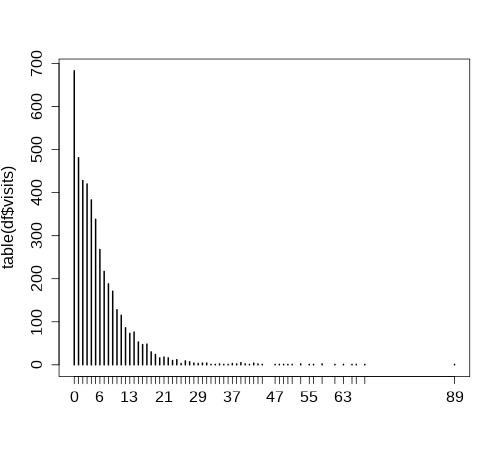

In [11]:
%%R -w 500 -h 450 -u px
plot(table(df$visits))

### Descriptive Statistics

#### Gender

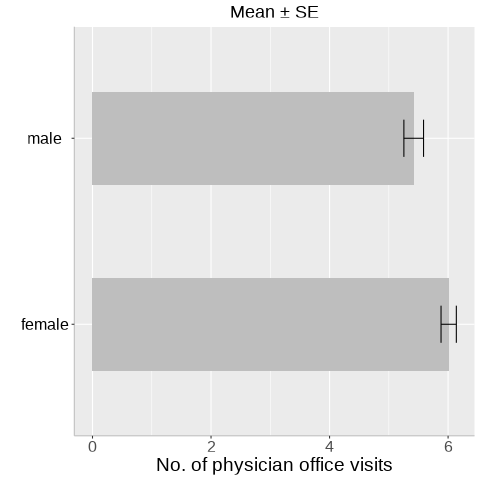

In [12]:
%%R
# Standard error
SE <- function(x){
  sd(x)/sqrt(length(x))
}

# Get summary statistics
summarise_gender<-plyr::ddply(df,~ gender, summarise,
                Mean= round(mean(visits), 2),
                Median=round (median(visits), 2),
                Min= round (min(visits),2),
                Max= round (max(visits),2),
                SD= round(sd(visits), 2),
                SE= round (SE(visits), 3))

# Barplot
ggplot(summarise_gender, aes(x=gender, y=Mean)) +
  geom_bar(stat="identity", position=position_dodge(),width=0.5, fill="gray") +
  geom_errorbar(aes(ymin=Mean-SE, ymax=Mean+SE), width=.2,
   position=position_dodge(.9))+
  # add y-axis title and x-axis title leave blank
  labs(y="No. of physician office visits", x = "")+
  # add plot title
  ggtitle("Mean ± SE ")+
  coord_flip()+
  # customize plot themes
  theme(
        axis.line = element_line(colour = "gray"),
        # plot title position at center
        plot.title = element_text(hjust = 0.5),
        # axis title font size
        axis.title.x = element_text(size = 14),
        # X and  axis font size
        axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5, colour='black'),
        axis.text.x = element_text(size=12))

#### African-American

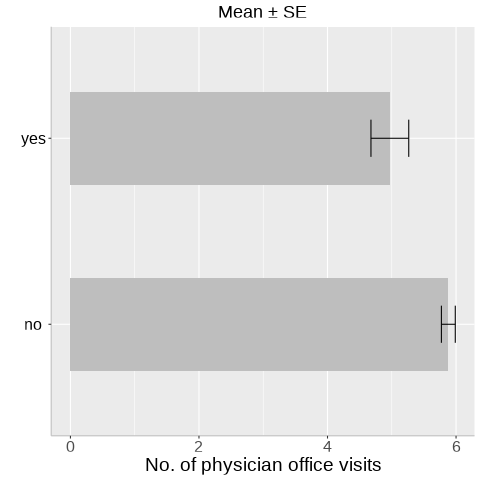

In [13]:
%%R
# Get summary statistics
summarise_afam<-plyr::ddply(df,~ afam, summarise,
                Mean= round(mean(visits), 2),
                Median=round (median(visits), 2),
                Min= round (min(visits),2),
                Max= round (max(visits),2),
                SD= round(sd(visits), 2),
                SE= round (SE(visits), 3))
# Barplot
ggplot(summarise_afam, aes(x=afam, y=Mean)) +
  geom_bar(stat="identity", position=position_dodge(),width=0.5, fill="gray") +
  geom_errorbar(aes(ymin=Mean-SE, ymax=Mean+SE), width=.2,
   position=position_dodge(.9))+
  # add y-axis title and x-axis title leave blank
  labs(y="No. of physician office visits", x = "")+
  # add plot title
  ggtitle("Mean ± SE")+
  coord_flip()+
  # customize plot themes
  theme(
        axis.line = element_line(colour = "gray"),
        # plot title position at center
        plot.title = element_text(hjust = 0.5),
        # axis title font size
        axis.title.x = element_text(size = 14),
        # X and  axis font size
        axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5, colour='black'),
        axis.text.x = element_text(size=12))

#### Self-perceived health status

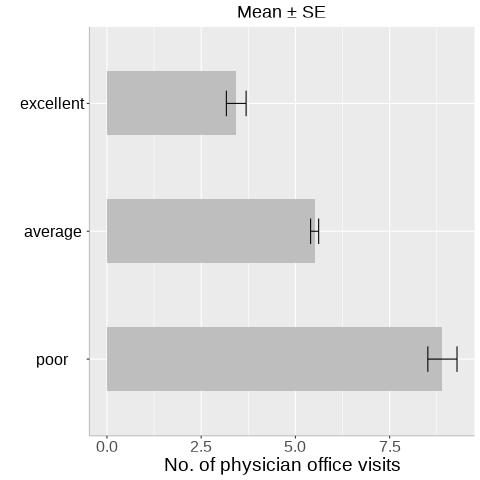

In [14]:
%%R
# Get summary statistics
summarise_health<-plyr::ddply(df,~ health, summarise,
                Mean= round(mean(visits), 2),
                Median=round (median(visits), 2),
                Min= round (min(visits),2),
                Max= round (max(visits),2),
                SD= round(sd(visits), 2),
                SE= round (SE(visits), 3))
# Barplot
ggplot(summarise_health, aes(x=health, y=Mean)) +
  geom_bar(stat="identity", position=position_dodge(),width=0.5, fill="gray") +
  geom_errorbar(aes(ymin=Mean-SE, ymax=Mean+SE), width=.2,
   position=position_dodge(.9))+
  # add y-axis title and x-axis title leave blank
  labs(y="No. of physician office visits", x = "")+
  # add plot title
  ggtitle("Mean ± SE")+
  coord_flip()+
  # customize plot themes
  theme(
        axis.line = element_line(colour = "gray"),
        # plot title position at center
        plot.title = element_text(hjust = 0.5),
        # axis title font size
        axis.title.x = element_text(size = 14),
        # X and  axis font size
        axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5, colour='black'),
        axis.text.x = element_text(size=12))

### Data Processing

In [15]:
%%R
# Convert categorical variables to factors
df$afam     <- as.factor(df$afam)
df$gender   <- as.factor(df$gender)
df$health   <- as.factor(df$health)
df$married  <- as.factor(df$married)
df$employed <- as.factor(df$employed)
df$insurance <- as.factor(df$insurance)
df$medicaid <- as.factor(df$medicaid)

In [16]:
%%R
# Split data by gender and afam with fixed proportion ----------------------
tr_prop <- 0.70
train <- ddply(df, .(gender, afam), function(sub) {
  set.seed(101)
  sub[sample(1:nrow(sub), size = round(nrow(sub) * tr_prop)), ]
})

test <- df[!(rownames(df) %in% rownames(train)), ]

# Ensure row names don't interfere
rownames(train) <- NULL
rownames(test) <- NULL

### Check Mean and Variance

To check for **overdispersion** or **underdispersion** in count data, you can compare the **variance** and **mean** of the response variable (i.e., the count data). Here's how to check for overdispersion and underdispersion:

-   **Poisson Distribution Assumption**: In a standard Poisson model, the mean and variance of the count variable are equal. That is:

    $$ E(Y) = \text{mean} = \lambda, \quad \text{Var}(Y) = \lambda $$

-   **Overdispersion**: Occurs when the variance is greater than the mean: $$ \text{Var}(Y) > E(Y) $$

-   **Underdispersion**: Occurs when the variance is smaller than the mean: $$ text{Var}(Y) < E(Y) $$

In [17]:
%%R
# Check Mean and Variance of "visits"
cat("Mean of visits (train):", mean(train$visits), "\n")
cat("Variance of visits (train):", var(train$visits), "\n")

if (var(train$visits) > mean(train$visits)) {
  cat(">> Overdispersion detected (var > mean)\n")
}

Mean of visits (train): 5.691734 
Variance of visits (train): 41.65689 
>> Overdispersion detected (var > mean)


### Fit a Poisson Regression Model

In [18]:
%%R
# Fit Poisson Model
pois_mod <- glm(visits ~ hospital + health + chronic + age + afam + gender +
                  married + school + income + employed + insurance + medicaid,
                family = poisson(link = "log"), data = train)

summary(pois_mod)


Call:
glm(formula = visits ~ hospital + health + chronic + age + afam + 
    gender + married + school + income + employed + insurance + 
    medicaid, family = poisson(link = "log"), data = train)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.343167   0.103206  13.014  < 2e-16 ***
hospital         0.161210   0.007186  22.433  < 2e-16 ***
healthpoor       0.202329   0.021629   9.354  < 2e-16 ***
healthexcellent -0.420848   0.037248 -11.299  < 2e-16 ***
chronic          0.146165   0.005727  25.521  < 2e-16 ***
age             -0.046468   0.012722  -3.653  0.00026 ***
afamyes         -0.072163   0.026634  -2.709  0.00674 ** 
gendermale      -0.120669   0.017448  -6.916 4.65e-12 ***
marriedyes      -0.040514   0.017993  -2.252  0.02434 *  
school           0.024514   0.002312  10.605  < 2e-16 ***
income           0.001034   0.002822   0.366  0.71408    
employedyes     -0.024014   0.027409  -0.876  0.38095    
insuranceyes     0.272667   0.02

In [20]:
%%R
# Check Overdispersion
dispersion <- sum(residuals(pois_mod, type = "pearson")^2) / pois_mod$df.residual
cat("Pearson Chi-Squared / DF (Overdispersion):", dispersion, "\n")
if (dispersion > 1.5) cat(">> Significant overdispersion\n")

Pearson Chi-Squared / DF (Overdispersion): 6.296201 
>> Significant overdispersion


In [22]:
%%R
# Check Zero Inflation
if (require(performance)) {
  zero_test_pois <- check_zeroinflation(pois_mod)
  print(zero_test_pois)
}


# Check for zero-inflation

   Observed zeros: 488
  Predicted zeros: 37
            Ratio: 0.08



### Fit Quasi Poisson Model

Fitting a Quasi-Poisson model is useful when we have overdispersion in the data, as it allows us to model the variance separately from the mean. The Quasi-Poisson model does not assume that the variance equals the mean, but rather allows for a dispersion parameter to adjust the variance. We will fit a Quasi-Poisson model to the training data and summarize the results. Note that AIC is not available for Quasi-Poisson models due to the quasi-likelihood estimation method.

In [23]:
%%R
# Fit Quasi-Poisson Model
quasi_pois_mod <- glm(visits ~ hospital + health + chronic + age + afam + gender +
                        married + school + income + employed + insurance + medicaid,
                      family = quasipoisson(link = "log"), data = train)

# Note: AIC not available for quasipoisson
cat("Quasi-Poisson model fitted (no AIC due to quasi-likelihood)\n")
summary(quasi_pois_mod)

Quasi-Poisson model fitted (no AIC due to quasi-likelihood)

Call:
glm(formula = visits ~ hospital + health + chronic + age + afam + 
    gender + married + school + income + employed + insurance + 
    medicaid, family = quasipoisson(link = "log"), data = train)

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.343167   0.258969   5.187 2.28e-07 ***
hospital         0.161210   0.018032   8.940  < 2e-16 ***
healthpoor       0.202329   0.054274   3.728 0.000197 ***
healthexcellent -0.420848   0.093465  -4.503 6.96e-06 ***
chronic          0.146165   0.014371  10.171  < 2e-16 ***
age             -0.046468   0.031922  -1.456 0.145583    
afamyes         -0.072163   0.066832  -1.080 0.280332    
gendermale      -0.120669   0.043782  -2.756 0.005883 ** 
marriedyes      -0.040514   0.045149  -0.897 0.369609    
school           0.024514   0.005800   4.226 2.45e-05 ***
income           0.001034   0.007081   0.146 0.883919    
employedyes     -0.024014

### Fit Negative Binomial Model

The Negative Binomial model is a more flexible alternative to the Poisson model that can handle overdispersion in count data. It allows the variance to exceed the mean, which is often the case in real-world datasets. We will fit a Negative Binomial model to the training data and summarize the results. The `MASS` package provides the `glm.nb()` function for fitting Negative Binomial models.

In [24]:
%%R
# Fit Negative Binomial Model
nb_mod <- glm.nb(visits ~ hospital + health + chronic + age + afam + gender +
                   married + school + income + employed + insurance + medicaid,
                 data = train)
summary(nb_mod)


Call:
glm.nb(formula = visits ~ hospital + health + chronic + age + 
    afam + gender + married + school + income + employed + insurance + 
    medicaid, data = train, init.theta = 1.228864431, link = log)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.1053204  0.2453960   4.504 6.66e-06 ***
hospital         0.2186652  0.0242741   9.008  < 2e-16 ***
healthpoor       0.2509257  0.0575168   4.363 1.28e-05 ***
healthexcellent -0.4226359  0.0728896  -5.798 6.70e-09 ***
chronic          0.1687999  0.0146568  11.517  < 2e-16 ***
age             -0.0253024  0.0303924  -0.833 0.405114    
afamyes         -0.0953660  0.0616520  -1.547 0.121901    
gendermale      -0.1255370  0.0410936  -3.055 0.002251 ** 
marriedyes      -0.0488731  0.0430098  -1.136 0.255821    
school           0.0251444  0.0054394   4.623 3.79e-06 ***
income           0.0040597  0.0068643   0.591 0.554239    
employedyes     -0.0001979  0.0629738  -0.003 0.997493    
insurancey

### Fit Zero-Inflated  Poisson (ZIP) Model

The Zero-Inflated Poisson (ZIP) model is used when the count data has an excess of zeros that cannot be explained by a standard Poisson model. It combines a Poisson count model with a binary model to account for the excess zeros. We will fit a ZIP model to the training data and summarize the results. The `pscl` package provides the `zeroinfl()` function for fitting ZIP models.

In [25]:
%%R
# Fit Zero-Inflated Poisson (ZIP) Model
zip_mod <- zeroinfl(visits ~ hospital + health + chronic + age + afam + gender +
                      married + school + income + employed + insurance + medicaid | .,
                    dist = "poisson", data = train)

summary(zip_mod)


Call:
zeroinfl(formula = visits ~ hospital + health + chronic + age + afam + 
    gender + married + school + income + employed + insurance + medicaid | 
    ., data = train, dist = "poisson")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-4.5622 -1.1385 -0.4631  0.5470 19.3728 

Count model coefficients (poisson with log link):
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.911769   0.106296  17.985  < 2e-16 ***
hospital         0.152161   0.007310  20.815  < 2e-16 ***
healthpoor       0.214535   0.021563   9.949  < 2e-16 ***
healthexcellent -0.361168   0.038544  -9.370  < 2e-16 ***
chronic          0.091743   0.005865  15.642  < 2e-16 ***
age             -0.066569   0.013013  -5.116 3.13e-07 ***
afamyes         -0.016266   0.026981  -0.603  0.54659    
gendermale      -0.057043   0.017825  -3.200  0.00137 ** 
marriedyes      -0.073986   0.018253  -4.053 5.05e-05 ***
school           0.016619   0.002359   7.045 1.85e-12 ***
income         

### Fit Zero-Inflated Negative Binomial (ZINB) Model

The Zero-Inflated Negative Binomial (ZINB) model is an extension of the ZIP model that allows for overdispersion in the count data. It combines a Negative Binomial count model with a binary model to account for excess zeros. We will fit a ZINB model to the training data and summarize the results. The `pscl` package provides the `zeroinfl()` function for fitting ZINB models.

In [26]:
%%R
# Fit Zero-Inflated Negative Binomial (ZINB) Model -------------------------
zinb_mod <- zeroinfl(visits ~ hospital + health + chronic + age + afam + gender +
                       married + school + income + employed + insurance + medicaid | .,
                     dist = "negbin", data = train)

summary(zinb_mod)


Call:
zeroinfl(formula = visits ~ hospital + health + chronic + age + afam + 
    gender + married + school + income + employed + insurance + medicaid | 
    ., data = train, dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.2287 -0.7109 -0.2781  0.3290 13.4664 

Count model coefficients (negbin with log link):
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.749396   0.249890   7.001 2.55e-12 ***
hospital         0.199552   0.024175   8.255  < 2e-16 ***
healthpoor       0.250395   0.053880   4.647 3.36e-06 ***
healthexcellent -0.372133   0.074330  -5.007 5.54e-07 ***
chronic          0.119000   0.014271   8.339  < 2e-16 ***
age             -0.069518   0.030736  -2.262 0.023712 *  
afamyes         -0.041292   0.062707  -0.658 0.510223    
gendermale      -0.056621   0.041413  -1.367 0.171550    
marriedyes      -0.083926   0.042913  -1.956 0.050495 .  
school           0.018110   0.005262   3.442 0.000578 ***
income           

### Fit Hurdle Models

Hurdle models are used for count data with excess zeros, where the zeros arise from a different process than the positive counts. They are particularly useful when the zero counts represent a distinct "hurdle" that must be crossed to observe positive counts. We will fit both Hurdle Poisson and Hurdle Negative Binomial models to the training data and summarize the results. The `pscl` package provides the `hurdle()` function for fitting hurdle models.

First we fit a Hurdle Poisson model, which assumes that the count data follows a Poisson distribution for positive counts and a binary model for the zero counts. Then we fit a Hurdle Negative Binomial model, which allows for overdispersion in the count data while still modeling the excess zeros separately.

In [27]:
%%R
# Hurdle Poisson
hurdle_pois <- hurdle(visits ~ hospital + health + chronic + age + afam + gender +
                        married + school + income + employed + insurance + medicaid,
                      dist = "poisson", data = train)

summary(hurdle_pois)


Call:
hurdle(formula = visits ~ hospital + health + chronic + age + afam + 
    gender + married + school + income + employed + insurance + medicaid, 
    data = train, dist = "poisson")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-4.5657 -1.1379 -0.4630  0.5473 19.3721 

Count model coefficients (truncated poisson with log link):
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.913560   0.106016  18.050  < 2e-16 ***
hospital         0.152135   0.007311  20.809  < 2e-16 ***
healthpoor       0.214744   0.021559   9.961  < 2e-16 ***
healthexcellent -0.361461   0.038574  -9.371  < 2e-16 ***
chronic          0.091694   0.005861  15.646  < 2e-16 ***
age             -0.066759   0.012986  -5.141 2.74e-07 ***
afamyes         -0.016200   0.026967  -0.601  0.54802    
gendermale      -0.057357   0.017817  -3.219  0.00129 ** 
marriedyes      -0.074119   0.018247  -4.062 4.87e-05 ***
school           0.016608   0.002357   7.048 1.82e-12 ***
income     

In [28]:
%%R
# Hurdle Negative Binomial
hurdle_nb <- hurdle(visits ~ hospital + health + chronic + age + afam + gender +
                      married + school + income + employed + insurance + medicaid,
                    dist = "negbin", data = train)

summary(hurdle_nb)


Call:
hurdle(formula = visits ~ hospital + health + chronic + age + afam + 
    gender + married + school + income + employed + insurance + medicaid, 
    data = train, dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.1989 -0.7117 -0.2744  0.3277 13.3528 

Count model coefficients (truncated negbin with log link):
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.7433951  0.2596955   6.713 1.90e-11 ***
hospital         0.2099479  0.0254282   8.256  < 2e-16 ***
healthpoor       0.2717668  0.0561863   4.837 1.32e-06 ***
healthexcellent -0.4136585  0.0785777  -5.264 1.41e-07 ***
chronic          0.1128257  0.0148091   7.619 2.56e-14 ***
age             -0.0680604  0.0321415  -2.118 0.034215 *  
afamyes         -0.0300820  0.0651091  -0.462 0.644063    
gendermale      -0.0517771  0.0428769  -1.208 0.227211    
marriedyes      -0.1010600  0.0446696  -2.262 0.023673 *  
school           0.0182257  0.0054608   3.338 0.000845 ***
in


### Model Comparison: AIC and Likelihood Ratio Test (LRT)

In [29]:
%%R
# Collect AICs (exclude quasipoisson)
models <- list(
  Poisson = pois_mod,
  NB = nb_mod,
  ZIP = zip_mod,
  ZINB = zinb_mod,
  Hurdle_Pois = hurdle_pois,
  Hurdle_NB = hurdle_nb
)

aic_values <- sapply(models, AIC)
cat("AIC Values:\n")
print(round(aic_values, 2))

AIC Values:
    Poisson          NB         ZIP        ZINB Hurdle_Pois   Hurdle_NB 
   24585.62    16988.85    22049.61    16869.90    22049.39    16856.82 


In [30]:
%%R
# Extract log-likelihoods
ll_pois <- logLik(pois_mod)
ll_nb   <- logLik(nb_mod)

# Degrees of freedom difference: NB has one extra parameter (theta)
dof <- attr(ll_nb, "df") - attr(ll_pois, "df")  # usually 1

# Compute LRT statistic
lrt_stat <- 2 * (as.numeric(ll_nb) - as.numeric(ll_pois))

# P-value under chi-square distribution with 1 df
p_val <- pchisq(lrt_stat, df = dof, lower.tail = FALSE)

# Output result
cat("Likelihood Ratio Test: Poisson vs Negative Binomial\n")
cat("LR Statistic:", round(lrt_stat, 3), "\n")
cat("p-value:", format.pval(p_val), "\n")

if (p_val < 0.05) {
  cat(">> Reject Poisson in favor of Negative Binomial (overdispersion present)\n")
} else {
  cat(">> Poisson model sufficient (no significant overdispersion)\n")
}

Likelihood Ratio Test: Poisson vs Negative Binomial
LR Statistic: 7598.768 
p-value: < 2.22e-16 
>> Reject Poisson in favor of Negative Binomial (overdispersion present)


### Model Performance Metrics

We will compute various performance metrics for the models fitted on the training data, including AIC, log-likelihood, RMSE, MAE, and Pseudo R-squared. The `performance` package can be used to compute Pseudo R-squared for GLMs.


In [31]:
%%R

perf_stats <- data.frame(
  Model = names(models),
  AIC = aic_values,
  LogLik = sapply(models, function(m) if (!is.null(logLik(m))) as.numeric(logLik(m)) else NA),
  RMSE = NA,
  MAE = NA,
  PseudoR2 = NA  # using performance::r2
)

for (i in 1:nrow(perf_stats)) {
  mod_name <- perf_stats$Model[i]
  mod <- models[[mod_name]]

  # Predictions
  pred <- suppressWarnings(predict(mod, newdata = train, type = "response"))
  obs <- train$visits

  perf_stats$RMSE[i] <- sqrt(mean((pred - obs)^2, na.rm = TRUE))
  perf_stats$MAE[i] <- mean(abs(pred - obs), na.rm = TRUE)

  # Use performance::r2 (better handling)
  r2_out <- try(performance::r2(mod), silent = TRUE)
  if (!inherits(r2_out, "try-error") && !is.null(r2_out$r2) && length(r2_out$r2) > 0) {
    perf_stats$PseudoR2[i] <- r2_out$r2
  } else {
    perf_stats$PseudoR2[i] <- NA
  }
}

print(perf_stats)

                  Model      AIC     LogLik     RMSE      MAE PseudoR2
Poisson         Poisson 24585.62 -12278.811 6.107013 4.039828       NA
NB                   NB 16988.85  -8479.427 6.346362 4.086878       NA
ZIP                 ZIP 22049.61 -10996.806 6.064220 4.009943       NA
ZINB               ZINB 16869.90  -8405.949 6.174844 4.034026       NA
Hurdle_Pois Hurdle_Pois 22049.39 -10996.694 6.064184 4.009997       NA
Hurdle_NB     Hurdle_NB 16856.82  -8399.408 6.202286 4.042368       NA


### Prediction Performance on Test Set

In [32]:
%%R
# Prediction Performance on Test Set
pred_test <- data.frame(
  true = test$visits
)

# Predict all models on test set
pred_test$poisson <- predict(pois_mod, newdata = test, type = "response")
pred_test$quasipoisson <- predict(quasi_pois_mod, newdata = test, type = "response")
pred_test$nb <- predict(nb_mod, newdata = test, type = "response")
pred_test$zip <- predict(zip_mod, newdata = test, type = "response")
pred_test$zinb <- predict(zinb_mod, newdata = test, type = "response")
pred_test$hurdle_pois <- predict(hurdle_pois, newdata = test, type = "response")
pred_test$hurdle_nb <- predict(hurdle_nb, newdata = test, type = "response")

# Compute test RMSE and MAE
test_perf <- data.frame(Model = c("Poisson", "Quasi-Poisson", "NB", "ZIP", "ZINB", "Hurdle_Pois", "Hurdle_NB"),
                        RMSE = NA, MAE = NA)

observed <- pred_test$true

test_perf$RMSE[1] <- sqrt(mean((observed - pred_test$poisson)^2))
test_perf$RMSE[2] <- sqrt(mean((observed - pred_test$quasipoisson)^2))
test_perf$RMSE[3] <- sqrt(mean((observed - pred_test$nb)^2))
test_perf$RMSE[4] <- sqrt(mean((observed - pred_test$zip)^2))
test_perf$RMSE[5] <- sqrt(mean((observed - pred_test$zinb)^2))
test_perf$RMSE[6] <- sqrt(mean((observed - pred_test$hurdle_pois)^2))
test_perf$RMSE[7] <- sqrt(mean((observed - pred_test$hurdle_nb)^2))

test_perf$MAE[1] <- mean(abs(observed - pred_test$poisson))
test_perf$MAE[2] <- mean(abs(observed - pred_test$quasipoisson))
test_perf$MAE[3] <- mean(abs(observed - pred_test$nb))
test_perf$MAE[4] <- mean(abs(observed - pred_test$zip))
test_perf$MAE[5] <- mean(abs(observed - pred_test$zinb))
test_perf$MAE[6] <- mean(abs(observed - pred_test$hurdle_pois))
test_perf$MAE[7] <- mean(abs(observed - pred_test$hurdle_nb))

cat("\n=== Test Set Prediction Performance ===\n")
print(test_perf)


=== Test Set Prediction Performance ===
          Model     RMSE      MAE
1       Poisson 5.936706 3.952750
2 Quasi-Poisson 5.936706 3.952750
3            NB 6.299022 4.053921
4           ZIP 5.880118 3.928295
5          ZINB 6.052700 3.978970
6   Hurdle_Pois 5.880185 3.928479
7     Hurdle_NB 6.088043 3.992208


## Summary and Conclusion

In this R tutorial, we explored the concepts and applications of Quasi-Poisson, Negative Binomial and Hurdle regression models on count data with overdispersion. These models are essential for analyzing count data, where the response variable represents the number of events occurring in a fixed unit of observation.

Initially, we introduced the Poisson regression model, which assumes that the response variable's mean and variance are equal. However, this assumption may not always be valid in real-world scenarios due to overdispersion, where the variance exceeds the mean. To address this issue, we explored the Quasi-Poisson regression model, which allows for overdispersion by introducing a dispersion parameter.

Furthermore, we discussed the Negative Binomial regression model, which is particularly useful when there is overdispersion and the variance exceeds the mean. This model relaxes the restrictive assumption of equal mean and variance in Poisson regression by incorporating an additional parameter to model the dispersion.

Throughout the tutorial, we provided examples of R code to illustrate the implementation of these regression models. We demonstrated how to fit the models, interpret the coefficients, assess model fit using goodness-of-fit tests, and make predictions.

In conclusion, Quasi-Poisson, Negative Binomial and Hurdle regression models offer valuable tools for analyzing count data in various fields such as epidemiology, ecology, and social sciences. Understanding the differences between these models and when to use each one is crucial for accurate and reliable statistical analysis. While Poisson regression assumes equal mean and variance and is suitable for modeling count data with low dispersion, Quasi-Poisson and Negative Binomial regression models provide flexibility to accommodate overdispersion, making them more robust for real-world data. By mastering these regression techniques and leveraging R's powerful statistical capabilities, researchers and practitioners can gain deeper insights into count data and make informed decisions based on sound statistical analysis.

## References

1. [UCLA IDRE Guide](https://stats.oarc.ucla.edu/r/dae/poisson-regression/)


2. [JSS Book: "Regression Models for Count Data in R](https://www.jstatsoft.org/article/view/v027i08)


3. [DataCamp Course](https://www.datacamp.com/courses/modeling-count-data-in-r)  


4. [R-bloggers: GLMs for Count Data](https://www.r-bloggers.com/analyzing-count-data-using-glm-in-r/)


6. [pscl Package Vignette](https://cran.r-project.org/web/packages/pscl/vignettes/countreg.pdf)  

7.  [Introduction: what is overdispersion?](https://biometry.github.io/APES//LectureNotes/2016-JAGS/Overdispersion/OverdispersionJAGS.html)

8.  [Tutorial: Poisson Regression in R](https://www.dataquest.io/blog/tutorial-poisson-regression-in-r/)

9.  [Chapter 4 Poisson Regression](https://bookdown.org/roback/bookdown-BeyondMLR/ch-poissonreg.html#sec-overdispPois)

10.  [Chapter 10 Poisson regression](https://bookdown.org/drki_musa/dataanalysis/poisson-regression.html)


